<a href="https://colab.research.google.com/github/raghav-fr/Models-for-hackathon/blob/main/Soil_wetness_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Soil wetness check for irrigation


# Load Data

In [5]:
import pandas as pd
df = pd.read_csv('Irrigation Scheduling.csv')
df.head()

,id,temperature,pressure,altitude,soilmiosture,note,status,class,date,time
0,1,29.10,9984.53,-12.21,377,0,0,Very Dry,08-10-2022,22:06:24
1,2,29.08,9984.36,-12.22,379,0,0,Very Dry,08-10-2022,22:06:24
2,3,29.06,9984.56,-12.20,376,0,0,Very Dry,08-10-2022,22:06:24
3,4,29.05,9984.39,-12.22,377,0,0,Very Dry,08-10-2022,22:06:24
4,5,29.03,9984.42,-12.21,379,0,0,Very Dry,08-10-2022,22:06:24


# Cleaning and processing data

In [6]:
df = df.drop(['id','date','time','note','status'],axis=1)
df.head()

,temperature,pressure,altitude,soilmiosture,class
0,29.10,9984.53,-12.21,377,Very Dry
1,29.08,9984.36,-12.22,379,Very Dry
2,29.06,9984.56,-12.20,376,Very Dry
3,29.05,9984.39,-12.22,377,Very Dry
4,29.03,9984.42,-12.21,379,Very Dry


In [8]:
df["altitude"] = df["altitude"].fillna(df["altitude"].mean())
df['altitude'].isna().sum()

np.int64(0)

In [13]:
X = df.drop(columns=["class"])
y = df["class"]

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(y)

In [18]:
df.head()

,temperature,pressure,altitude,soilmiosture,class
0,29.10,9984.53,-12.21,377,1
1,29.08,9984.36,-12.22,379,1
2,29.06,9984.56,-12.20,376,1
3,29.05,9984.39,-12.22,377,1
4,29.03,9984.42,-12.21,379,1


In [19]:
X = df.drop(columns=["class"])
y = df["class"]

# Model Building

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced"
)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


In [22]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))



Model Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

         Dry       1.00      1.00      1.00        73
    Very Dry       1.00      1.00      1.00       205
    Very Wet       1.00      1.00      1.00       369
         Wet       1.00      1.00      1.00       291

    accuracy                           1.00       938
   macro avg       1.00      1.00      1.00       938
weighted avg       1.00      1.00      1.00       938



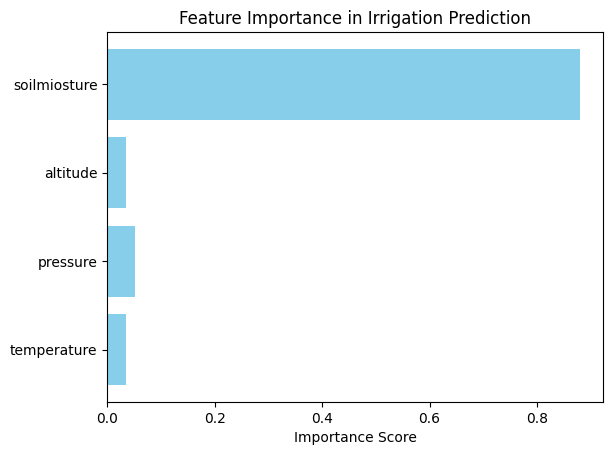

In [24]:
import matplotlib.pyplot as plt
importances = rf.feature_importances_
features = X.columns

plt.barh(features, importances, color='skyblue')
plt.xlabel("Importance Score")
plt.title("Feature Importance in Irrigation Prediction")
plt.show()